In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import DataFrame as df

In [48]:
TrafficCounts = pd.read_json("https://data.cityofchicago.org/resource/pfsx-4n4m.json")
Congestion = pd.read_json("https://data.cityofchicago.org/resource/sxs8-h27x.json")

tc_head = TrafficCounts.head(5)
tc_description = TrafficCounts.describe()
tc_shape = TrafficCounts.shape

In [ ]:
def find_null_vals(df):
    """Return the number of null values in the data frame"""
    count = 0
    for row in df:
        for datapoint in row:
            if (pd.isnull(datapoint)):
                count += 1
    return count

In [ ]:
find_null_vals(TrafficCounts)

In [ ]:
date_column = TrafficCounts["date_of_count"]
date_lst = date_column.values.tolist()


In [35]:
def make_new_date_cols(date_list):
    lst = []
    for val in date_list:
        year = int(val[:4])
        month = int(val[5:7])
        day = int(val[8:10])
        hour = int(val[11:13])
        minute = int(val[14:16])
        second = int(val[17:19])
        lst.append([year, month, day, hour, minute, second])
    return np.array(lst)

In [ ]:
date_arr = make_new_date_cols(date_lst)
# TrafficCounts.insert(0, "Year", date_arr[:,0])
TrafficCounts.insert(1, "Month", date_arr[:,1])
TrafficCounts.insert(2, "Day", date_arr[:,2])
TrafficCounts.insert(3, "Hour", date_arr[:,3])

In [ ]:
TrafficCounts = TrafficCounts.sort_values(["Year","Month","Day","Hour"])

In [ ]:
plt.plot(range(1000), TrafficCounts["total_passing_vehicle_volume"])
plt.show()

In [5]:
Congestion.head(100)

time  segment_id  speed    street direction  \
0   2020-11-09T20:01:57.000        1132     -1    Cicero        SB   
1   2020-11-09T20:01:57.000        1182     18  Broadway        NB   
2   2020-11-09T20:01:57.000        1184     20  Sheridan        NB   
3   2020-11-09T20:01:57.000        1152     20    Harlem        NB   
4   2020-11-09T20:01:57.000        1134     24    Cicero        SB   
..                      ...         ...    ...       ...       ...   
95  2020-11-09T20:01:55.000        1247     -1   Halsted        SB   
96  2020-11-09T20:01:55.000        1233     28   Halsted        SB   
97  2020-11-09T20:01:55.000        1280     22  Columbus        NB   
98  2020-11-09T20:01:55.000        1231     20   Halsted        NB   
99  2020-11-09T20:01:55.000        1286     15   Chicago        WB   

   from_street    to_street    length street_heading             comments  \
0         31st     Pershing  1.008068              S  Outside City Limits   
1    Hollywood        Devon  0.882968              N                  NaN   
2        Pratt        Touhy  0.519765              N                  NaN   
3      Chicago    North Ave  1.007062              N  Outside City Limits   
4    Roosevelt       Cermak  1.016148              S  Outside City Limits   
..         ...          ...       ...            ...                  ...   
95        47th         51st  0.500000              S                  NaN   
96       103rd        107th  0.500000              S                  NaN   
97    Randolph     Illinois  0.450000              N                  NaN   
98     Addison  Irving Park  0.500000              N                  NaN   
99    Michigan      LaSalle  0.430000              W                  NaN   

    ...          record_id  start_latitude  start_longitude  end_latitude  \
0   ...  1132-202011100201       41.836747       -87.743932     41.822142   
1   ...  1182-202011100201       41.985461       -87.659942     41.998208   
2   ...  1184-202011100201       42.005539       -87.660736     42.012829   
3   ...  1152-202011100201       41.894268       -87.805101     41.908856   
4   ...  1134-202011100201       41.865963       -87.744985     41.851245   
..  ...                ...             ...              ...           ...   
95  ...  1247-202011100201       41.808864       -87.645729     41.801585   
96  ...  1233-202011100201       41.706916       -87.643023     41.699640   
97  ...  1280-202011100201       41.884414       -87.620542     41.891002   
98  ...  1231-202011100201       41.947316       -87.649296     41.954562   
99  ...  1286-202011100201       41.896835       -87.624241     41.896714   

    end_longitude                                     start_location  \
0      -87.743772  {'type': 'Point', 'coordinates': [-87.74393180...   
1      -87.660173  {'type': 'Point', 'coordinates': [-87.65994165...   
2      -87.663269  {'type': 'Point', 'coordinates': [-87.66073575...   
3      -87.805554  {'type': 'Point', 'coordinates': [-87.80510079...   
4      -87.744434  {'type': 'Point', 'coordinates': [-87.74498520...   
..            ...                                                ...   
95     -87.645536  {'type': 'Point', 'coordinates': [-87.645729, ...   
96     -87.642797  {'type': 'Point', 'coordinates': [-87.643023, ...   
97     -87.620124  {'type': 'Point', 'coordinates': [-87.620542, ...   
98     -87.649509  {'type': 'Point', 'coordinates': [-87.649296, ...   
99     -87.632709  {'type': 'Point', 'coordinates': [-87.624241, ...   

                                         end_location  \
0   {'type': 'Point', 'coordinates': [-87.74377226...   
1   {'type': 'Point', 'coordinates': [-87.66017284...   
2   {'type': 'Point', 'coordinates': [-87.66326941...   
3   {'type': 'Point', 'coordinates': [-87.80555365...   
4   {'type': 'Point', 'coordinates': [-87.74443371...   
..                                                ...   
95  {'type': 'Point', 'coordinates': [-87.645536, ...   
96  {'type'

In [50]:
cong_date_arr = make_new_date_cols(Congestion["time"].values.tolist())
cong_date_arr

array([[2020,   11,    9,   20,   31,   39],
       [2020,   11,    9,   20,   31,   38],
       [2020,   11,    9,   20,   31,   38],
       ...,
       [2020,   11,    9,   20,   31,   14],
       [2020,   11,    9,   20,   31,   14],
       [2020,   11,    9,   20,   31,   14]])

In [52]:
Congestion = Congestion.drop(columns=["Year","Month","Day","Hour","Minute","Second"])
Congestion.insert(0, "Year", cong_date_arr[:,0])
Congestion.insert(1, "Month", cong_date_arr[:,1])
Congestion.insert(2, "Day", cong_date_arr[:,2])
Congestion.insert(3, "Hour", cong_date_arr[:,3])
Congestion.insert(4, "Minute", cong_date_arr[:,4])
Congestion.insert(5, "Second", cong_date_arr[:,5])
Congestion = Congestion.sort_values(["Year","Month","Day","Hour","Minute","Second"])
Congestion = Congestion.replace(-1, np.nan)

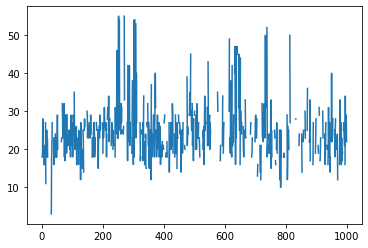

In [53]:
plt.plot(range(1000), Congestion["speed"])
plt.show()